In [26]:
%matplotlib inline
%config Completer.use_jedi = False # to use autocomplete
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import os
import json
import pandas as pd
import sklearn
from random import seed
from sklearn.model_selection import KFold
from sklearn import linear_model, ensemble, neighbors, tree
from sklearn import metrics
from sklearn.neural_network import MLPRegressor
# from sklearn.preprocessing import PolynomialFeatures
# from texttable import Texttable
import scipy.optimize as optimization
RANDOM_SEED=0
seed(RANDOM_SEED)
np.random.seed(RANDOM_SEED)
print(sklearn.__version__)
from itertools import combinations
from numpy.random import default_rng
import itertools
plt.rcdefaults()
# plt.rcParams.update({'font.family':'fantasy'})

0.24.2


In [27]:
def path_leaf(path): # get filename(with extension) from path
    head, tail = os.path.split(path)
    return tail or os.path.basename(head)


def file_in_folder(folder_path, flag=1): # get files in given folder, return list of filepath and filename
    file_list = []
    file_name = []
    for(dirpath, dirnames, filenames) in os.walk(folder_path):
#         print(filenames)
        
        for i in filenames:
            try:
                file_list += [dirpath + os.sep + i]
                file_name += [i]
            except:
                continue
        if flag == 0:
            break
        file_list.sort(key=path_leaf)
        file_name.sort()
    return [file_list, file_name]

In [28]:
res_dir = '../../prediction_code/3_mse_in_sample_transfer_domain/in_sample'
all_folders = [os.path.join(res_dir, i) for i in os.listdir(res_dir)]

data_folder = '../../data/PPP_normalized_44'
file_list, file_name = file_in_folder(data_folder)
file_list = [i for i in file_list if '.csv' in i]
file_name = [i for i in file_name if '.csv' in i]
num_name_dic = {i: name for i, name in enumerate(file_name)}
name_num_dic = {name: i for i, name in enumerate(file_name)}
print(num_name_dic, name_num_dic)

all_params = ['a', 'b', 'd', 'g']
CPT_models = []
for i in range(1, len(all_params)+1):
    tmp = list(itertools.combinations(all_params, i))
    CPT_models += tmp
    
CPT_models = [''.join(i) for i in CPT_models]
CPT_models = ['g', 'ab', 'dg', 'abg', 'abdg']
# model_types = [model_types[-1]]
print(CPT_models)
ML_models = ['DT', 'RF', 'NN']
ML_models = ['Lasso', 'RF', 'NN']
ML_models = ['EU_expo', 'EU_iso', 'RF', 'NN', 'kernel_ridge_rbf']
ML_models = ['EU_iso', 'RF', 'kernel_ridge_rbf']
all_models = CPT_models + ML_models

{0: 'Australia_data_30countries.csv', 1: 'Belgium_data_30countries.csv', 2: 'Brazil_data_30countries.csv', 3: 'Cambodia_data_30countries.csv', 4: 'Chile_data_30countries.csv', 5: 'China_data_30countries.csv', 6: 'Colombia_data_30countries.csv', 7: 'Costa Rica_data_30countries.csv', 8: 'Czech Republic_data_30countries.csv', 9: 'Ethiopia_data_30countries.csv', 10: 'France_data_30countries.csv', 11: 'Germany_data_30countries.csv', 12: 'Guatemala_data_30countries.csv', 13: 'India_data_30countries.csv', 14: 'Japan_data_30countries.csv', 15: 'Kyrgyzstan_data_30countries.csv', 16: 'Malaysia_data_30countries.csv', 17: 'Monetary incentives in the loss domain.csv', 18: 'Nicaragua_data_30countries.csv', 19: 'Nigeria_data_30countries.csv', 20: 'Peru_data_30countries.csv', 21: 'Poland_data_30countries.csv', 22: 'Russia_data_30countries.csv', 23: 'Saudi Arabia_data_30countries.csv', 24: 'South Africa_data_30countries.csv', 25: 'Spain_data_30countries.csv', 26: 'Thailand_data_30countries.csv', 27: 'T

In [29]:
show_num_name_dic = {'num': [], 'name': []}
for key, val in num_name_dic.items():
    show_num_name_dic['num'].append(key)
    show_num_name_dic['name'].append(val)
num_name_df = pd.DataFrame.from_dict(show_num_name_dic)
print(num_name_df.to_latex(index=False))
num_name_df


\begin{tabular}{rl}
\toprule
 num &                                               name \\
\midrule
   0 &                     Australia\_data\_30countries.csv \\
   1 &                       Belgium\_data\_30countries.csv \\
   2 &                        Brazil\_data\_30countries.csv \\
   3 &                      Cambodia\_data\_30countries.csv \\
   4 &                         Chile\_data\_30countries.csv \\
   5 &                         China\_data\_30countries.csv \\
   6 &                      Colombia\_data\_30countries.csv \\
   7 &                    Costa Rica\_data\_30countries.csv \\
   8 &                Czech Republic\_data\_30countries.csv \\
   9 &                      Ethiopia\_data\_30countries.csv \\
  10 &                        France\_data\_30countries.csv \\
  11 &                       Germany\_data\_30countries.csv \\
  12 &                     Guatemala\_data\_30countries.csv \\
  13 &                         India\_data\_30countries.csv \\
  14 &             

,num,name
0,0,Australia_data_30countries.csv
1,1,Belgium_data_30countries.csv
2,2,Brazil_data_30countries.csv
3,3,Cambodia_data_30countries.csv
4,4,Chile_data_30countries.csv
5,5,China_data_30countries.csv
6,6,Colombia_data_30countries.csv
7,7,Costa Rica_data_30countries.csv
8,8,Czech Republic_data_30countries.csv
9,9,Ethiopia_data_30countries.csv


In [30]:
def get_in_sample(folder='../../prediction_code/mse_in_sample_transfer_domain/in_sample'):
    in_sample_folders = os.listdir(folder)
    res = {}
    for cur_fol in in_sample_folders:
        file_list, file_name = file_in_folder(os.path.join(folder, cur_fol))
        file_list = [i for i in file_list if '.json' in i]
        file_name = [i for i in file_name if '.json' in i]
#         print(file_list)
        for file in file_list:
            with open(file, 'r') as f:
                content = json.load(f)
#             print(content)
            if cur_fol not in res.keys():
                res[cur_fol] = {}
#             print(file)
#             if '/EU' in file:
#                 tmp = 'EU'
#             else:
            tmp = content['model_type']
            if tmp == 'RF' or tmp == 'kernel_ridge_rbf':
                print(file)
            res[cur_fol][tmp] = content['train_mse']
    print(res)
    return res

In [31]:
in_sample_res = get_in_sample()

../../prediction_code/mse_in_sample_transfer_domain/in_sample/32/RF_new.json
../../prediction_code/mse_in_sample_transfer_domain/in_sample/32/kernel_ridge_rbf_new.json
../../prediction_code/mse_in_sample_transfer_domain/in_sample/35/RF_new.json
../../prediction_code/mse_in_sample_transfer_domain/in_sample/35/kernel_ridge_rbf_new.json
../../prediction_code/mse_in_sample_transfer_domain/in_sample/34/RF_new.json
../../prediction_code/mse_in_sample_transfer_domain/in_sample/34/kernel_ridge_rbf_new.json
../../prediction_code/mse_in_sample_transfer_domain/in_sample/33/RF_new.json
../../prediction_code/mse_in_sample_transfer_domain/in_sample/33/kernel_ridge_rbf_new.json
../../prediction_code/mse_in_sample_transfer_domain/in_sample/20/RF_new.json
../../prediction_code/mse_in_sample_transfer_domain/in_sample/20/kernel_ridge_rbf_new.json
../../prediction_code/mse_in_sample_transfer_domain/in_sample/18/RF_new.json
../../prediction_code/mse_in_sample_transfer_domain/in_sample/18/kernel_ridge_rbf_n

In [32]:
def get_round(a, digit=3):
    return round(a, digit)

def get_res(folder, normalize=False, in_sample_dic=None):
    file_list, file_name = file_in_folder(folder)
    file_list = [i for i in file_list if '.json' in i]
    file_name = [i for i in file_name if '.json' in i]
    print(file_list)
    res_dic = {'model': [], 'train_data': [], 'train_mse': []}
    train_data = folder.split('/')[1]
    for model_type in all_models:
        for file in file_list:
            file_type = path_leaf(file).split('.json')[0]
            if model_type == file_type:
                with open(file, 'r') as f:
                    content = json.load(f)
#                 print(content)
                res_dic['model'].append(content['model_type'])
                res_dic['train_data'].append(train_data)
                res_dic['train_mse'].append(get_round(content['train_mse']))
                for key, val in content['test_mse'].items():
                    if key not in res_dic.keys():
                        res_dic[key] = []
                    if normalize:
                        res_dic[key].append(get_round(val/in_sample_dic[key][model_type]))
                    else:
                        res_dic[key].append(get_round(val))

#     print(res_dic)
    df = pd.DataFrame.from_dict(res_dic)
    display(df)
    print(df.to_latex(index=False))
    return res_dic

In [33]:
print(len(in_sample_res.keys()))
in_sample_res['31']

44


{'EU_iso': 306687621.31341386,
 'RF': 223564700.79127482,
 'a': 298436111.7655749,
 'ab': 297999520.27154714,
 'abd': 291276841.036299,
 'abdg': 226492755.67801186,
 'abg': 226507403.92863357,
 'ad': 291276841.0362987,
 'adg': 226654993.74199992,
 'ag': 229674254.17012292,
 'b': 319239811.8765137,
 'bd': 293078915.0490764,
 'bdg': 233094070.01005057,
 'bg': 252506596.24761423,
 'd': 293078915.0490763,
 'dg': 233094070.01005054,
 'g': 255588006.62003183,
 'kernel_ridge_rbf': 225736236.51645756}

In [34]:
all_content = {}
for folder in all_folders:
    file_list, file_name = file_in_folder(folder)
    file_list = [i for i in file_list if '.json' in i]
    file_name = [i for i in file_name if '.json' in i]
    for file in file_list:
        file_type = path_leaf(file).split('.json')[0]
        try:
            with open(file, 'r') as f:
                content = json.load(f)
        except:
            print(file)
        all_content[file] = content

In [35]:
# all_missing = {i: [] for i in CPT_models + ML_models}
# for folder in all_folders:
#     file_list, file_name = file_in_folder(folder)
#     file_list = [i for i in file_list if '.json' in i]
#     file_name = [i for i in file_name if '.json' in i]
#     for file in file_list:
#         file_type = path_leaf(file).split('.json')[0]
#         all_missing[file_type].append(int(folder))

In [36]:
def get_index(arr, median_of):
    # median_of is 'min', 'max', or percentile (50, 75, 90, etc.)
    if median_of == 'max':
        return np.argmax(arr)
    elif median_of == 'min':
        return np.argmin(arr)
    else:
        percent = int(median_of)
        interpolation = 'higher'
        if percent < 50:
            interpolation = 'lower'
        val = np.percentile(arr, percent, interpolation=interpolation)
#         if val in arr:
#             print(1, val)
#         else:
#             print(0, val)
#             print(arr)
        if type(arr) == np.ndarray:
            return np.where(arr == val)[0][0]
        else:
            return arr.index(val)

def get_percentile(arr, median_of):
    # median_of is 'min', 'max', or percentile (50, 75, 90, etc.)
    if median_of == 'max':
        return np.max(arr)
    elif median_of == 'min':
        return np.min(arr)
    else:
        percent = int(median_of)
        interpolation = 'higher'
        if percent < 50:
            interpolation = 'lower'
        val = np.percentile(arr, percent, interpolation=interpolation)
        return val

def get_median_transfer_error(folder_list, all_contents=None, normalize=False, in_sample_dic=None, use_best_in_sample=False, median_of='max', median_of_list=None, model_to_see=None):
    if use_best_in_sample:
        best_in_sample_across_model = {}
        for key, val in in_sample_dic.items():
            best_in_sample_across_model[key] = {}

            best_in_sample = 1e10
            for model_type, cur_error in val.items():
                if model_type not in model_to_see:
                    continue
                if best_in_sample > cur_error:
                    best_in_sample = cur_error
            for model_type in val.keys():
                if model_type not in model_to_see:
                    continue
                best_in_sample_across_model[key][model_type] = best_in_sample
    else:
        best_in_sample_across_model = in_sample_dic
    
        
#     print(best_in_sample_across_model)
#     res_dic = {'model': [], 'train_data': [], 'train_mse': []}
    res_dic = {}
    all_res_dic = {}
    count = 0
    for folder in folder_list:
#         if count > 0:
#             break
#         count += 1
        file_list, file_name = file_in_folder(folder)
        file_list = [i for i in file_list if '.json' in i]
        file_name = [i for i in file_name if '.json' in i]
#         print(file_list)
        
        train_data = folder.split('/')[1]
        for model_type in model_to_see:
            if model_type not in res_dic.keys():
                res_dic[model_type] = {'train_data': [], 'transfer_domain': [], 'in_sample': [], 
                                       'raw_transfer': [], 'best_in_sample': [], 'transfer_ratio': []}
                all_res_dic[model_type] = {'train_data': [], 'transfer_domain': [], 'in_sample': [], 
                                       'raw_transfer': [], 'best_in_sample': [], 'transfer_ratio': []}
            for file in file_list:
                file_type = path_leaf(file).split('.json')[0]
#                 print(file_type)
                if 'RF' in file_type or 'kernel_ridge_rbf' in file_type:
#                     print(file_type)
                    if 'domain_cv' not in file_type:
                        continue
                    else:
                        if 'checkpoint' in file:
                            continue
        #                 file_type = path_leaf(file).split('.json')[0]
                        try:
                            with open(file, 'r') as f:
                                content = json.load(f)
                            file_type = content['model_type']
                        except:
                            file_type = path_leaf(file).split('.json')[0]
#                 print(file)
#                 print(file_type)
                if model_type == file_type:
                    if all_contents is not None:
                        content = all_contents[file]
                    else:
                        with open(file, 'r') as f:
                            content = json.load(f)

                    all_transfer_domain = []
                    all_transfer_error_ratio = []
                    raw_transfer = []
                    in_sample = []
                    best_in_sample = []
                    for key, val in content['test_mse'].items():
                        all_transfer_domain.append(key)
                        raw_transfer.append(get_round(np.sqrt(val)))
                        in_sample.append(get_round(np.sqrt(in_sample_dic[key][model_type])))
                        best_in_sample.append(get_round(np.sqrt(best_in_sample_across_model[key][model_type])))
#                         all_transfer_error_ratio.append(get_round(best_in_sample_across_model[key][model_type]/val))
                        all_transfer_error_ratio.append(get_round(np.sqrt(val)/np.sqrt(best_in_sample_across_model[key][model_type])))
#                         if normalize:
#                             all_transfer_error_ratio.append(get_round(best_in_sample_across_model[key][model_type]/val))
#                         else:
#                             all_transfer_error_ratio.append(get_round(val))
                    
#                     print(len(all_transfer_domain))
                    if normalize:
                        list_to_find_index = all_transfer_error_ratio
                    else:
                        list_to_find_index = raw_transfer
#                     best_idx = np.argmax(raw_transfer)
                    best_idx = get_index(list_to_find_index, median_of=median_of)
#                     print(best_idx)
                    res_dic[model_type]['train_data'].append(train_data)
                    res_dic[model_type]['transfer_ratio'].append(all_transfer_error_ratio[best_idx])
                    res_dic[model_type]['transfer_domain'].append(all_transfer_domain[best_idx])
                    res_dic[model_type]['raw_transfer'].append(raw_transfer[best_idx])
                    res_dic[model_type]['in_sample'].append(in_sample[best_idx])
                    res_dic[model_type]['best_in_sample'].append(best_in_sample[best_idx])
                    
                    all_res_dic[model_type]['train_data'].append([train_data]*len(all_transfer_error_ratio))
                    all_res_dic[model_type]['transfer_ratio'].append(all_transfer_error_ratio)
                    all_res_dic[model_type]['transfer_domain'].append(all_transfer_domain)
                    all_res_dic[model_type]['raw_transfer'].append(raw_transfer)
                    all_res_dic[model_type]['in_sample'].append(in_sample)
                    all_res_dic[model_type]['best_in_sample'].append(best_in_sample)
    
    
    final_return = {}
    for median_of in median_of_list:
        print(median_of)
        res_dic = {}
        for model_type in model_to_see:
            if model_type not in res_dic.keys():
                res_dic[model_type] = {'train_data': [], 'transfer_domain': [], 'in_sample': [], 
                                       'raw_transfer': [], 'best_in_sample': [], 'transfer_ratio': []}
            
#             for i in range(len(all_res_dic[model_type]['train_data'])):
            train_data = all_res_dic[model_type]['train_data'][0][0]
            all_transfer_domain = np.array(all_res_dic[model_type]['transfer_domain']).reshape(-1,)
            all_transfer_error_ratio = np.array(all_res_dic[model_type]['transfer_ratio']).reshape(-1,)
            raw_transfer = np.array(all_res_dic[model_type]['raw_transfer']).reshape(-1,)
            in_sample = np.array(all_res_dic[model_type]['in_sample']).reshape(-1,)
            best_in_sample = np.array(all_res_dic[model_type]['best_in_sample']).reshape(-1,)
#             print(all_transfer_domain.shape, all_transfer_error_ratio.shape, raw_transfer.shape, in_sample.shape, best_in_sample.shape)

            if normalize:
                list_to_find_index = all_transfer_error_ratio
            else:
                list_to_find_index = raw_transfer

            best_idx = get_index(list_to_find_index, median_of=median_of)

            res_dic[model_type]['train_data'].append(train_data)
            res_dic[model_type]['transfer_ratio'].append(all_transfer_error_ratio[best_idx])
            res_dic[model_type]['transfer_domain'].append(all_transfer_domain[best_idx])
            res_dic[model_type]['raw_transfer'].append(raw_transfer[best_idx])
            res_dic[model_type]['in_sample'].append(in_sample[best_idx])
            res_dic[model_type]['best_in_sample'].append(best_in_sample[best_idx])
            
            
            
        if normalize:
            sort_key = 'transfer_ratio'
        else:
            sort_key = 'raw_transfer'
        final_res = {'model': [], 'train_data': [], 'transfer_domain': [], 'in_sample': [], 'raw_transfer': [], 
                     'best_in_sample': [], 'transfer_ratio': []}
        only_median_res = {'model': [], 'median_transfer_error': []}
        for key, val in res_dic.items():
#             print(key)
            df = pd.DataFrame.from_dict(val)
#             print(df.shape)
#             display(df)
            final_res['model'].append(key)
            final_res['train_data'].append(df['train_data'].values[0])
            final_res['transfer_domain'].append(df['transfer_domain'].values[0])
            final_res['transfer_ratio'].append(df['transfer_ratio'].values[0])
            final_res['raw_transfer'].append(df['raw_transfer'].values[0])
            final_res['in_sample'].append(df['in_sample'].values[0])
            final_res['best_in_sample'].append(df['best_in_sample'].values[0])

        final_return[median_of] = final_res[sort_key]
#     return final_res[sort_key]
    return final_return

## For each training domain, find the specific transfer error.  Then report the median of the specific transfer errors, across training domains.

In [37]:
%%time
raw_transfer_dic = {}
median_of_list = ['max', 95, 90, 75, 50, 25, 10, 5, 'min']

raw_transfer_dic = get_median_transfer_error(all_folders, all_contents=all_content, normalize=False, in_sample_dic=in_sample_res, use_best_in_sample=False, median_of_list=median_of_list, model_to_see=CPT_models+ML_models)

max
95
90
75
50
25
10
5
min
CPU times: user 1min 46s, sys: 5.39 s, total: 1min 51s
Wall time: 1min 58s


## For each training domain, find the MAX ratio normalized by best IN SAMPLE of ALL MODELS. Then report the median of the max ratios, across training domains.

In [38]:
%%time
best_normalize_dic = {}

best_normalize_dic = get_median_transfer_error(all_folders, all_contents=all_content, normalize=True, 
                                               in_sample_dic=in_sample_res, use_best_in_sample=True, median_of_list=median_of_list, model_to_see=CPT_models+ML_models)

max
95
90
75
50
25
10
5
min
CPU times: user 1min 45s, sys: 5.1 s, total: 1min 50s
Wall time: 1min 57s


## For each training domain, find the MAX ratio normalized by MODEL IN SAMPLE. Then report the median of the max ratios, across training domains.

In [39]:
%%time
same_model_normalize_dic = {}

same_model_normalize_dic = get_median_transfer_error(all_folders, all_contents=all_content, normalize=True, 
                                                     in_sample_dic=in_sample_res, use_best_in_sample=False, median_of_list=median_of_list, model_to_see=CPT_models+ML_models)

max
95
90
75
50
25
10
5
min
CPU times: user 1min 45s, sys: 4.8 s, total: 1min 50s
Wall time: 1min 56s


# make tables

In [40]:
def make_tables(model, data, median_of_list):
    res = {'model': model}
    for median_of in median_of_list:
        res[median_of] = data[median_of]
#     res[f'lower_{lower_percent}'] = data[lower_percent]
#     res[f'higher_{higher_percent}'] = data[higher_percent]

    df = pd.DataFrame.from_dict(res)
    display(df)
    print(df.to_latex(index=False))
#     return res

In [41]:
make_tables(all_models, raw_transfer_dic, median_of_list)
make_tables(all_models, best_normalize_dic, median_of_list)
make_tables(all_models, same_model_normalize_dic, median_of_list)

,model,max,95,90,75,50,25,10,5,min
0,g,23104.960,20.674,10.310,5.056,3.994,3.182,2.817,2.501,0.811
1,ab,24254.849,16.067,9.902,5.040,3.884,3.208,2.863,2.563,0.714
2,dg,23037.372,22.195,9.549,5.067,3.977,3.199,2.756,2.480,0.714
3,abg,28979.758,19.757,9.486,5.879,4.008,3.199,2.764,2.482,0.714
4,abdg,38093.235,18.125,9.308,5.900,4.011,3.204,2.764,2.485,0.714
5,EU_iso,20161.466,16.227,9.941,4.995,3.829,3.155,2.854,2.560,0.724
6,RF,42519.224,23.557,14.338,5.175,3.920,3.212,2.818,2.649,0.783
7,kernel_ridge_rbf,42519.231,33.622,17.409,5.800,4.568,3.679,2.972,2.727,0.712


\begin{tabular}{lrrrrrrrrr}
\toprule
           model &       max &     95 &     90 &    75 &    50 &    25 &    10 &     5 &   min \\
\midrule
               g & 23104.960 & 20.674 & 10.310 & 5.056 & 3.994 & 3.182 & 2.817 & 2.501 & 0.811 \\
              ab & 24254.849 & 16.067 &  9.902 & 5.040 & 3.884 & 3.208 & 2.863 & 2.563 & 0.714 \\
              dg & 23037.372 & 22.195 &  9.549 & 5.067 & 3.977 & 3.199 & 2.756 & 2.480 & 0.714 \\
             abg & 28979.758 & 19.757 &  9.486 & 5.879 & 4.008 & 3.199 & 2.764 & 2.482 & 0.714 \\
            abdg & 38093.235 & 18.125 &  9.308 & 5.900 & 4.011 & 3.204 & 2.764 & 2.485 & 0.714 \\
          EU\_iso & 20161.466 & 16.227 &  9.941 & 4.995 & 3.829 & 3.155 & 2.854 & 2.560 & 0.724 \\
              RF & 42519.224 & 23.557 & 14.338 & 5.175 & 3.920 & 3.212 & 2.818 & 2.649 & 0.783 \\
kernel\_ridge\_rbf & 42519.231 & 33.622 & 17.409 & 5.800 & 4.568 & 3.679 & 2.972 & 2.727 & 0.712 \\
\bottomrule
\end{tabular}



,model,max,95,90,75,50,25,10,5,min
0,g,7.307,2.581,1.643,1.264,1.078,1.043,1.028,1.024,1.010
1,ab,4.511,2.124,1.515,1.182,1.095,1.072,1.055,1.037,1.003
2,dg,7.225,2.398,1.638,1.278,1.076,1.041,1.027,1.021,1.000
3,abg,6.164,2.653,2.025,1.364,1.080,1.042,1.028,1.022,1.000
4,abdg,5.994,2.654,2.021,1.369,1.081,1.043,1.028,1.022,1.000
5,EU_iso,4.419,2.131,1.469,1.168,1.083,1.062,1.048,1.035,1.000
6,RF,42.245,4.338,2.843,1.382,1.072,1.031,1.017,1.012,1.000
7,kernel_ridge_rbf,7.612,4.510,3.394,1.635,1.280,1.063,1.027,1.019,1.000


\begin{tabular}{lrrrrrrrrr}
\toprule
           model &    max &    95 &    90 &    75 &    50 &    25 &    10 &     5 &   min \\
\midrule
               g &  7.307 & 2.581 & 1.643 & 1.264 & 1.078 & 1.043 & 1.028 & 1.024 & 1.010 \\
              ab &  4.511 & 2.124 & 1.515 & 1.182 & 1.095 & 1.072 & 1.055 & 1.037 & 1.003 \\
              dg &  7.225 & 2.398 & 1.638 & 1.278 & 1.076 & 1.041 & 1.027 & 1.021 & 1.000 \\
             abg &  6.164 & 2.653 & 2.025 & 1.364 & 1.080 & 1.042 & 1.028 & 1.022 & 1.000 \\
            abdg &  5.994 & 2.654 & 2.021 & 1.369 & 1.081 & 1.043 & 1.028 & 1.022 & 1.000 \\
          EU\_iso &  4.419 & 2.131 & 1.469 & 1.168 & 1.083 & 1.062 & 1.048 & 1.035 & 1.000 \\
              RF & 42.245 & 4.338 & 2.843 & 1.382 & 1.072 & 1.031 & 1.017 & 1.012 & 1.000 \\
kernel\_ridge\_rbf &  7.612 & 4.510 & 3.394 & 1.635 & 1.280 & 1.063 & 1.027 & 1.019 & 1.000 \\
\bottomrule
\end{tabular}



,model,max,95,90,75,50,25,10,5,min
0,g,7.222,1.497,1.384,1.111,1.015,1.002,1.000,1.000,1.000
1,ab,2.427,1.198,1.114,1.028,1.010,1.003,1.000,1.000,1.000
2,dg,7.156,1.537,1.432,1.229,1.046,1.013,1.004,1.002,1.000
3,abg,6.105,2.043,1.640,1.282,1.058,1.019,1.006,1.003,1.000
4,abdg,5.937,2.052,1.709,1.324,1.062,1.021,1.008,1.005,1.000
5,EU_iso,1.674,1.265,1.104,1.026,1.008,1.002,1.000,1.000,1.000
6,RF,42.245,4.338,2.843,1.382,1.072,1.031,1.017,1.012,1.000
7,kernel_ridge_rbf,7.602,4.441,3.393,1.618,1.272,1.055,1.021,1.013,0.877


\begin{tabular}{lrrrrrrrrr}
\toprule
           model &    max &    95 &    90 &    75 &    50 &    25 &    10 &     5 &   min \\
\midrule
               g &  7.222 & 1.497 & 1.384 & 1.111 & 1.015 & 1.002 & 1.000 & 1.000 & 1.000 \\
              ab &  2.427 & 1.198 & 1.114 & 1.028 & 1.010 & 1.003 & 1.000 & 1.000 & 1.000 \\
              dg &  7.156 & 1.537 & 1.432 & 1.229 & 1.046 & 1.013 & 1.004 & 1.002 & 1.000 \\
             abg &  6.105 & 2.043 & 1.640 & 1.282 & 1.058 & 1.019 & 1.006 & 1.003 & 1.000 \\
            abdg &  5.937 & 2.052 & 1.709 & 1.324 & 1.062 & 1.021 & 1.008 & 1.005 & 1.000 \\
          EU\_iso &  1.674 & 1.265 & 1.104 & 1.026 & 1.008 & 1.002 & 1.000 & 1.000 & 1.000 \\
              RF & 42.245 & 4.338 & 2.843 & 1.382 & 1.072 & 1.031 & 1.017 & 1.012 & 1.000 \\
kernel\_ridge\_rbf &  7.602 & 4.441 & 3.393 & 1.618 & 1.272 & 1.055 & 1.021 & 1.013 & 0.877 \\
\bottomrule
\end{tabular}



# percentile condifence interval result

In [42]:
def calculate_interval(model, data, lower_percent, higher_percent, m=44, k=1):
    res = {'model': [], f'lower_{lower_percent}': [], f'higher_{higher_percent}': [], 'RHS': []}
    res['model'] = model
    res[f'lower_{lower_percent}'] = data[lower_percent]
    res[f'higher_{higher_percent}'] = data[higher_percent]
#     res['RHS'] = [(2 * (res['higher'][i] - res['lower'][i])) / (m - k + 1) for i in range(len(res['lower']))]
    res['RHS'] = [
        (2 * (np.ceil(higher_percent/100 * (m-k)) - np.floor(lower_percent/100 * (m-k)))) / (m - k + 1) 
        for i in range(len(res[f'lower_{lower_percent}']))]
    df = pd.DataFrame.from_dict(res)
    display(df)
    print(df.to_latex(index=False))
    return res

In [43]:
# raw_transfer_dic
# best_normalize_dic
# same_model_normalize_dic
raw_transfer_interval = calculate_interval(all_models, raw_transfer_dic, lower_percent=10, higher_percent=90)

,model,lower_10,higher_90,RHS
0,g,2.817,10.310,1.590909
1,ab,2.863,9.902,1.590909
2,dg,2.756,9.549,1.590909
3,abg,2.764,9.486,1.590909
4,abdg,2.764,9.308,1.590909
5,EU_iso,2.854,9.941,1.590909
6,RF,2.818,14.338,1.590909
7,kernel_ridge_rbf,2.972,17.409,1.590909


\begin{tabular}{lrrr}
\toprule
           model &  lower\_10 &  higher\_90 &      RHS \\
\midrule
               g &     2.817 &     10.310 & 1.590909 \\
              ab &     2.863 &      9.902 & 1.590909 \\
              dg &     2.756 &      9.549 & 1.590909 \\
             abg &     2.764 &      9.486 & 1.590909 \\
            abdg &     2.764 &      9.308 & 1.590909 \\
          EU\_iso &     2.854 &      9.941 & 1.590909 \\
              RF &     2.818 &     14.338 & 1.590909 \\
kernel\_ridge\_rbf &     2.972 &     17.409 & 1.590909 \\
\bottomrule
\end{tabular}



In [44]:
best_normalize_interval = calculate_interval(all_models, best_normalize_dic, lower_percent=10, higher_percent=90)

,model,lower_10,higher_90,RHS
0,g,1.028,1.643,1.590909
1,ab,1.055,1.515,1.590909
2,dg,1.027,1.638,1.590909
3,abg,1.028,2.025,1.590909
4,abdg,1.028,2.021,1.590909
5,EU_iso,1.048,1.469,1.590909
6,RF,1.017,2.843,1.590909
7,kernel_ridge_rbf,1.027,3.394,1.590909


\begin{tabular}{lrrr}
\toprule
           model &  lower\_10 &  higher\_90 &      RHS \\
\midrule
               g &     1.028 &      1.643 & 1.590909 \\
              ab &     1.055 &      1.515 & 1.590909 \\
              dg &     1.027 &      1.638 & 1.590909 \\
             abg &     1.028 &      2.025 & 1.590909 \\
            abdg &     1.028 &      2.021 & 1.590909 \\
          EU\_iso &     1.048 &      1.469 & 1.590909 \\
              RF &     1.017 &      2.843 & 1.590909 \\
kernel\_ridge\_rbf &     1.027 &      3.394 & 1.590909 \\
\bottomrule
\end{tabular}



In [45]:
same_model_interval = calculate_interval(all_models, same_model_normalize_dic, lower_percent=10, higher_percent=90)

,model,lower_10,higher_90,RHS
0,g,1.000,1.384,1.590909
1,ab,1.000,1.114,1.590909
2,dg,1.004,1.432,1.590909
3,abg,1.006,1.640,1.590909
4,abdg,1.008,1.709,1.590909
5,EU_iso,1.000,1.104,1.590909
6,RF,1.017,2.843,1.590909
7,kernel_ridge_rbf,1.021,3.393,1.590909


\begin{tabular}{lrrr}
\toprule
           model &  lower\_10 &  higher\_90 &      RHS \\
\midrule
               g &     1.000 &      1.384 & 1.590909 \\
              ab &     1.000 &      1.114 & 1.590909 \\
              dg &     1.004 &      1.432 & 1.590909 \\
             abg &     1.006 &      1.640 & 1.590909 \\
            abdg &     1.008 &      1.709 & 1.590909 \\
          EU\_iso &     1.000 &      1.104 & 1.590909 \\
              RF &     1.017 &      2.843 & 1.590909 \\
kernel\_ridge\_rbf &     1.021 &      3.393 & 1.590909 \\
\bottomrule
\end{tabular}



# plot intervals

In [46]:
color_dic = {'g': 'tab:blue', 'ab': 'tab:orange', 'dg': 'tab:green', 'abg': 'tab:red', 'abdg': 'tab:purple', 
           'RF': 'tab:brown', 'Random Forest': 'tab:brown', 'kernel_ridge_rbf': 'tab:pink', 'EU_iso': 'tab:gray'
          }
def change_to_greek(models):
    dic = {'g': r'$\gamma$', 'ab': r'$\alpha\beta$', 'dg': r'$\delta\gamma$', 
           'abg': r'$\alpha\beta\gamma$', 'abdg': r'$\alpha\beta\delta\gamma$', 
           'RF': 'RF', 'NN': 'NN', 'Random Forest': 'RF', 'Neural Net': 'NN', 
           'kernel_ridge_poly': 'OLS-poly', 'kernel_ridge_rbf': 'KR', 'EU_expo': 'EU-CARA', 'EU_iso': 'EU'
          }
    
    res = []
    for i in models:
        res.append(dic[i])
    return res

def plot_intervals(model, data, lower_percent, higher_percent, keyword='Errors', capwidth=0.2, x_scale=None, savepath=None):
    lw = 2.5
    res = {'model': [], f'lower': [], f'higher': [], 'RHS': []}
    res['model'] = model
    res[f'lower'] = data[lower_percent]
    res[f'higher'] = data[higher_percent]
    count = 0
    for i in range(len(res['lower'])):
        if all_models[i] not in model:
            continue
        x = np.linspace(res['lower'][i], res['higher'][i], 100)
        y = [len(model)-1-count]*100
#         plt.plot(x, y, linewidth=10)
        plt.plot(x, y, lw=lw)
        
        bar_x = [x[0]]*100
        bar_y = np.linspace(y[0]-capwidth/2, y[0]+capwidth/2, 100)
        plt.plot(bar_x, bar_y, color='k', lw=lw)
        bar_x = [x[-1]]*100
        bar_y = np.linspace(y[-1]-capwidth/2, y[-1]+capwidth/2, 100)
        plt.plot(bar_x, bar_y, color='k', lw=lw)
        count += 1
        
    
#     plt.caption(f'{keyword} from {lower_percent}-percentile to {higher_percent}-percentile')
    plt.xlabel(f'{keyword}')
    plt.ylabel(f'Models')
    plt.yticks(range(len(model)), change_to_greek(reversed(model)))
    if x_scale == 'log':
        plt.xscale('log')
#     savepath=None
    if savepath:
        plt.savefig(savepath, dpi=300, bbox_inches='tight')
    plt.show()


def plot_intervals(model, data, lower_percent, higher_percent, keyword='Errors', capwidth=0.2, x_scale=None, savepath=None):
    lw = 2.5
    res = {'model': [], f'lower': [], f'higher': [], 'RHS': []}
    res['model'] = model
    res[f'lower'] = data[lower_percent]
    res[f'higher'] = data[higher_percent]
    count = 0
    plot_dic = {}
    for i in range(len(res['lower'])):
        if all_models[i] not in model:
            continue
        x = np.linspace(res['lower'][i], res['higher'][i], 100)
        y = [len(model)-1-count]*100
#         plt.plot(x, y, linewidth=10)
        plot_dic[res['higher'][i] - res['lower'][i]] = {'x': x, 'y': y, 'model': res['model'][i]}
    
    model_order = []
    for key in sorted(plot_dic.keys()):
        x = plot_dic[key]['x']
        y = [len(model)-1-count]*100
        model_order.append(plot_dic[key]['model'])
        plt.plot(x, y, lw=lw, color=color_dic[plot_dic[key]['model']])
        
        bar_x = [x[0]]*100
        bar_y = np.linspace(y[0]-capwidth/2, y[0]+capwidth/2, 100)
        plt.plot(bar_x, bar_y, color='k', lw=lw)
        bar_x = [x[-1]]*100
        bar_y = np.linspace(y[-1]-capwidth/2, y[-1]+capwidth/2, 100)
        plt.plot(bar_x, bar_y, color='k', lw=lw)
        count += 1
        
    
#     plt.caption(f'{keyword} from {lower_percent}-percentile to {higher_percent}-percentile')
    plt.xlabel(f'{keyword}')
    plt.ylabel(f'Models')
    if x_scale == 'log':
        plt.xscale('log')
    plt.yticks(range(len(model_order)), change_to_greek(reversed(model_order)))
    if savepath:
        plt.savefig(savepath, dpi=300, bbox_inches='tight')
    plt.show()

## 9-95 percentile

In [47]:
plt.rcdefaults()
plt.rcParams.update({'font.size':18})
plt.rcParams.update({'font.family':'Times New Roman'})
plt.rc('text', usetex=True)
lower_percent = 5
higher_percent = 95
transfer_error = 'Transfer error'
normalized_transfer = 'Normalized transfer error'
same_model_transfer = 'Transfer deterioration'
transfer_error = 'Raw transfer error'
normalized_transfer = 'Transfer shortfall'
same_model_transfer = 'Transfer deterioration'
# fol = '../stack_figures/to_stack'
fol = '.'

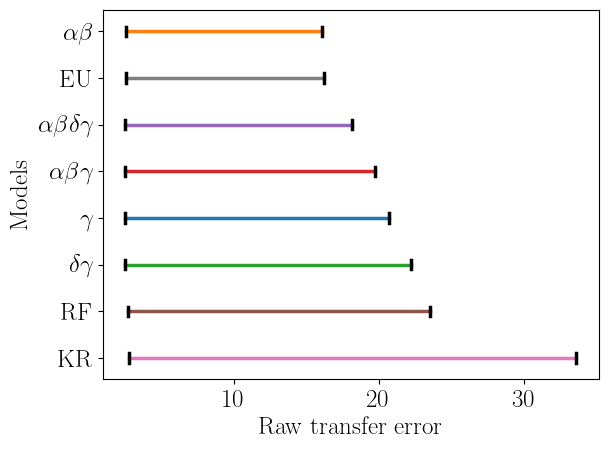

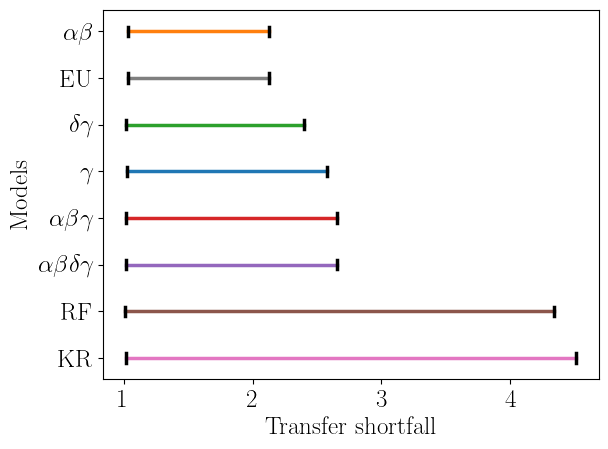

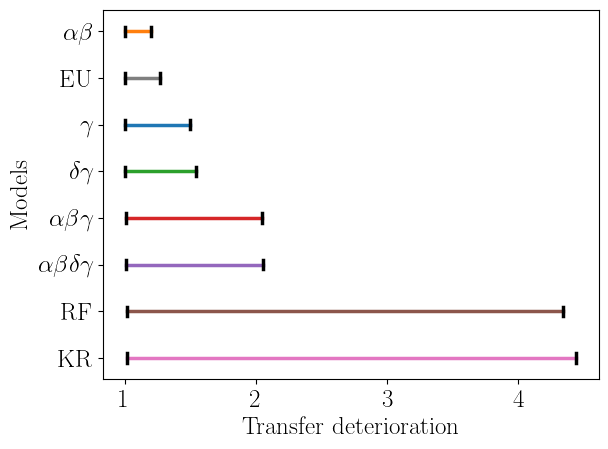

In [48]:
plot_intervals(all_models, raw_transfer_dic, lower_percent=lower_percent, higher_percent=higher_percent, keyword=transfer_error, x_scale=None, savepath=f'{fol}/{lower_percent}_{higher_percent}_interval_transfer_error.pdf')
plot_intervals(all_models, best_normalize_dic, lower_percent=lower_percent, higher_percent=higher_percent, keyword=normalized_transfer, x_scale=None, savepath=f'{fol}/{lower_percent}_{higher_percent}_interval_normalized_transfer_error.pdf')
plot_intervals(all_models, same_model_normalize_dic, lower_percent=lower_percent, higher_percent=higher_percent, keyword=same_model_transfer, x_scale=None, savepath=f'{fol}/{lower_percent}_{higher_percent}_interval_transfer_deterioration.pdf')

# plot_intervals(CPT_models, raw_transfer_dic, lower_percent=lower_percent, higher_percent=higher_percent, keyword=transfer_error, savepath=f'{fol}/CPT_{lower_percent}_{higher_percent}_interval_transfer_error.pdf')
# plot_intervals(CPT_models, best_normalize_dic, lower_percent=lower_percent, higher_percent=higher_percent, keyword=normalized_transfer, savepath=f'{fol}/CPT_{lower_percent}_{higher_percent}_interval_normalized_transfer_error.pdf')
# plot_intervals(CPT_models, same_model_normalize_dic, lower_percent=lower_percent, higher_percent=higher_percent, keyword=same_model_transfer, savepath=f'{fol}/CPT_{lower_percent}_{higher_percent}_interval_transfer_deterioration.pdf')